# Homework 3 - Introduction to Data Science - Fall 2021

# Guidelines
- If asked to fit a model to given data, do not preprocess the given data before fitting. 
- Use default values for any parameters not mentioned in a problem statement.
- Comment where appropriate for clarity.

# Problem 1

We will apply decision trees to the `Titanic` dataset for prediction of passenger survival. The dataset contains the following variables:

* `Pclass`: Ticket class where 1 = 1st, 2 = 2nd, 3 = 3rd
* `Sex`: Female/male
* `Embarked`: Port of Embarkation where C = Cherbourg, Q = Queenstown, S = Southampton
* `SibSp`: Number of siblings
* `Parch`: Number of parents
* `Age`: Age in years	
* `Fare`: Passenger fare	
* `Survived`: 0 = No, 1 = Yes

In [1]:
import pandas as pd

titanic = pd.read_csv("titanic.csv")

# Select subset of columns.
columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Age','Fare','Survived']
titanic = titanic[columns]

# Fill NA values.
titanic['Embarked'].fillna("S", inplace=True)
med_age = int(titanic['Age'].median())
titanic['Age'].fillna(med_age, inplace=True)

# Encode classes as integers.
titanic['Sex'] = titanic['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
titanic['Embarked'] = titanic['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

# Print.
titanic

,Pclass,Sex,Embarked,SibSp,Parch,Age,Fare,Survived
0,3,1,1,1,0,22.0,7.2500,0
1,1,0,2,1,0,38.0,71.2833,1
2,3,0,1,0,0,26.0,7.9250,1
3,1,0,1,1,0,35.0,53.1000,1
4,3,1,1,0,0,35.0,8.0500,0
...,...,...,...,...,...,...,...,...
886,2,1,1,0,0,27.0,13.0000,0
887,1,0,1,0,0,19.0,30.0000,1
888,3,0,1,1,2,28.0,23.4500,0
889,1,1,2,0,0,26.0,30.0000,1


In [2]:
from sklearn.model_selection import train_test_split

# Test/train split.
X_titan = titanic.drop('Survived', axis = 1)
y_titan = titanic[['Survived']]
X_titan_train, X_titan_test, y_titan_train, y_titan_test = train_test_split(X_titan, y_titan, test_size=1/3, random_state=42)

## 1.1
For `max_depth` ranging from 1 to 50, fit decision tree classifiers using `random_state=42` and store the training and test accuracies in the given variables.

Best prediction accuracy:  0.8215488215488216
Depth:  3


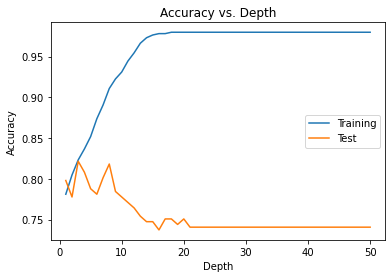

In [94]:
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

depth = np.arange(1,51,1)
dtaccuracy_train = [] # List for storing training accuracies.
dtaccuracy_test = [] # List for storing test accuracies.

### YOUR CODE HERE:
for dep in depth:
    clf = tree.DecisionTreeClassifier(random_state=42, max_depth=dep)
    clf.fit(X_titan_train, y_titan_train)
    score_train = clf.score(X_titan_train, y_titan_train)
    score_test = clf.score(X_titan_test, y_titan_test)
    dtaccuracy_train.append(score_train)
    dtaccuracy_test.append(score_test)


print("Best prediction accuracy: ", max(dtaccuracy_test))
print("Depth: ", depth[dtaccuracy_test.index(max(dtaccuracy_test))])

plt.plot(depth, dtaccuracy_train, label = "Training")
plt.plot(depth, dtaccuracy_test, label = "Test")
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Depth")
plt.legend()
plt.show()

## 1.2
What trends do you observe in the training and test accuracies as depth increases? Explain these trends.

### Answer:
As the depth of the decision tree increases, the model fits the training data better and better which performs as the training accuracy is getting higher and higher, but the test results of the test data first become better and then become worse, indicating that a certain degree of depth can have better generalization performance while too large depth of the value will lead to the occurrence of model overfitting.


## 1.3
For the decision tree with the best test accuracy, print the three most important features.

In [95]:
# YOUR CODE HERE:
import heapq
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_titan_train, y_titan_train)
top_3 = clf.feature_importances_.argsort()[-3:][::-1]
print(f'The three most important features are {columns[top_3[0]]}, {columns[top_3[1]]} and {columns[top_3[2]]}')

The three most important features are Sex, Pclass and Fare


# Problem 2
We continue to explore prediction on the `Titanic` dataset with random forests.

## 2.1
For `n_estimators` ranging from 1 to 201 with step size 10, fit random forest classifiers using `random_state=42` and `max_depth=3`. Store the training and test accuracies in the given variables.

Best prediction accuracy:  0.8282828282828283
n_estimators:  [101 131 151 161 171]


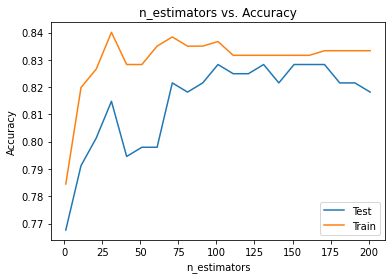

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

rf_arru_lst_test = [] # List for storing training accuracies.
rf_arru_lst_train = [] # List for storing test accuracies.
n_estimators_lst = np.arange(1,202,10)


# YOUR CODE HERE:

for n_est in n_estimators_lst:
    clf = RandomForestClassifier(n_estimators=n_est, random_state=42, max_depth=3)
    clf.fit(X_titan_train, y_titan_train.values.ravel())
    score_train = clf.score(X_titan_train, y_titan_train)
    score_test = clf.score(X_titan_test, y_titan_test)
    rf_arru_lst_train.append(score_train)
    rf_arru_lst_test.append(score_test)


# print "Best prediction accuracy" and corresponding "n_estimators"
# YOUR CODE HERE:
print("Best prediction accuracy: ", max(rf_arru_lst_test))
print("n_estimators: ", n_estimators_lst[np.where(rf_arru_lst_test==max(rf_arru_lst_test))])


# plot the accuracies
plt.plot(n_estimators_lst, rf_arru_lst_test, label = "Test")
plt.plot(n_estimators_lst, rf_arru_lst_train, label = "Train")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('n_estimators vs. Accuracy')
plt.legend()
plt.show()

## 2.2
What trends do you observe in the training and test accuracies as `n_estimators` increases? Explain these trends.

### Answer:
A random forest with multiple decision trees has better predictive ability than a single decision tree. With the increasing of n_estimators, the train accuracy achieves the best prediction results soon and then slightly down and the test accuracy first rise, then fall, then rise, having the same tendency with the former. We can see that those two accuracy is getting closer as n_estimators getting larger which indicating that the model the model has a better ability to prevent overfitting.

## 2.3
`GridSearchCV` is a class to assist in finding the best parameters for a model. Read about `GridSearchCV` here:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

To use `GridSearchCV`, follow these steps:
* Create your model object.
* Create a dictionary with the model parameters and ranges over which you want to optimize.
* Create a `GridSearchCV` object and fit it on your training data.
* Access the attributes of the `GridSearchCV` object to find the optimal parameters and scores.

For a Random Forest model with `random_state=42`, use `GridSearchCV` with 10-fold CV to determine the best combination of the following parameters:
* `max_depth` ranging from 1 to 10
* `n_estimators` ranging from 1 to 10

Print the best parameters and corresponding score.

In [100]:
from sklearn.model_selection import GridSearchCV

# create the default model
# YOUR CODE HERE:
model = RandomForestClassifier(random_state=42)

# Grid of parameters over which to optimize.
# YOUR CODE HERE:
max_depth_ls = [i for i in range(1, 11, 1)]
n_estimators_ls = [i for i in range(1, 11, 1)]
param_grid = dict(max_depth=max_depth_ls, n_estimators=n_estimators_ls)

# search the grid
# YOUR CODE HERE:
grid_search = GridSearchCV(model, param_grid, cv=10)

# Print the "Best parameters" and its "Score"
# YOUR CODE HERE:
grid_result = grid_search.fit(X_titan_train, y_titan_train.values.ravel()) 
print("Best: %f using %s" % (grid_result.best_score_,grid_search.best_params_))

Best: 0.831638 using {'max_depth': 9, 'n_estimators': 10}


# Problem 3

We will apply logistic regression to the problem of classifying images of fashion articles in the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist).

In [90]:
import numpy as np
import pandas as pd

fash = pd.read_csv("fash.csv")
labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"]
fash['label'].replace(to_replace=np.arange(0,10), value=labels, inplace=True)

X_fash = fash.iloc[:, 1:]
y_fash = fash.iloc[:, 0]

display(fash)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Pullover,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ankle boot,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Shirt,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,T-shirt/top,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,Dress,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Bag,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,Trouser,0,0,0,0,0,0,0,0,0,...,164,0,0,0,0,0,0,0,0,0
997,Coat,0,0,0,0,0,0,0,0,1,...,0,0,0,0,170,193,11,0,0,0
998,Sneaker,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.1
Fit a logistic regression model for image classification to the data with `penalty="none"`. Print the first three images using [`matplotlib.pyplot.imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) along with your model classifications and the predicted probabilities of each class.

Pullover
[0.00000000e+000 3.95834831e-142 3.68502660e-077 0.00000000e+000
 1.00000000e+000 0.00000000e+000 8.69498365e-167 0.00000000e+000
 1.10432384e-246 2.57892975e-220]


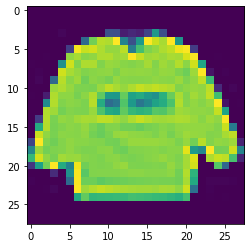

Ankle boot
[1.00000000e+000 8.38096793e-227 0.00000000e+000 0.00000000e+000
 1.59008064e-278 1.33344182e-100 2.96439388e-323 1.02328358e-040
 0.00000000e+000 1.48970631e-308]


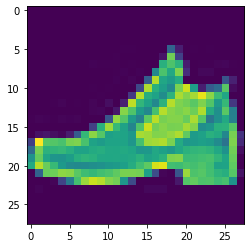

Shirt
[0.00000000e+000 1.71263508e-222 8.98438277e-093 1.19595039e-121
 6.88858677e-119 0.00000000e+000 1.00000000e+000 0.00000000e+000
 1.73728650e-172 1.63645406e-311]


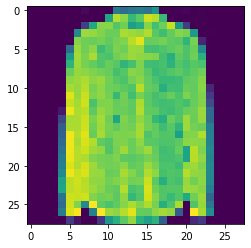

In [91]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# YOUR CODE HERE:
clf = LogisticRegression(penalty="none") 
clf.fit(X_fash, y_fash)

for k in range(3):
    print(clf.predict(X_fash.iloc[k].values.reshape(1,-1))[0])
    print(clf.predict_proba(X_fash.iloc[k].values.reshape(1,-1))[0])
    plt.imshow(X_fash.iloc[k].values.reshape(28,28))
    plt.show()


## 3.2
In the previous part we used no penalty term. Now we will explore L2 penalization. Answer the following questions in the context of logistic regression:
1. What is L2 penalization?
2. What main benefit does it have and how does it achieve that?

### Answer:
1. Perform quadratic constraints on the parameters of the function
2. Prevent the model from over-fitting and solve the problem of distortion of the classification boundary. It is achieved by adding $\lambda\sum\theta^2$ in the cost function

## 3.3
Fit logistic regression models to the data using L2 regularization and the given values of `C`. Determine the optimal value of the inverse regularization strength parameter $C$ by performing 5-fold cross-validation. Plot the averaged `accuracy_score` associated with the each model against $\log(C)$.

Optimal C: 0.1


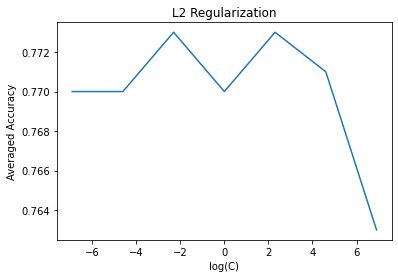

In [92]:
from numpy.linalg import norm
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

C = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
cv_scores = [0]*7 # List for storing the averaged accuracies.

# YOUR CODE HERE:

for i, _ in enumerate(C):
    model = LogisticRegression(penalty='l2', C=_)
    scores = cross_val_score(model, X_fash, y_fash, cv=5, scoring='accuracy')
    cv_scores[i] = scores.mean()


# Print the "Optimal C"
# YOUR CODE HERE:

print('Optimal C:', C[cv_scores.index(max(cv_scores))])


plt.plot(np.log(C), cv_scores)
plt.xlabel("log(C)")
plt.ylabel("Averaged Accuracy")
plt.title("L2 Regularization")
plt.show()

# The version may lead to different optimal C.

## 3.4
Perform a random 80/20 split into training and test data set and use the optimal `C` of Problem 3.3 to train a logistic regression model. Plot the confusion matrix of the test set.

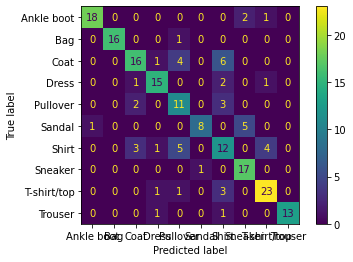

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

# YOUR CODE HERE:
X_train, X_test, y_train, y_test = train_test_split(X_fash, y_fash, test_size=0.2, random_state=100)
model = LogisticRegression(penalty='l2', C=10.)
model.fit(X_train, y_train)
plot_confusion_matrix(model, X_test, y_test);

## 3.5
For this model, which is the class label with the lowest classification accuracy in the test set?

### Answer: 
Shirt has the lowest classification accuarcy in the test set.


# Problem 4

We explore classification using support vector machines (SVM) on the [`wine`](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset) dataset. Wines are divided into class 0 and class 1.

     color_intensity   hue
0               5.64  1.04
1               4.38  1.05
2               5.68  1.03
3               7.80  0.86
4               4.32  1.04
..               ...   ...
173             7.70  0.64
174             7.30  0.70
175            10.20  0.59
176             9.30  0.60
177             9.20  0.61

[178 rows x 2 columns]
0      1
1      1
2      1
3      1
4      1
      ..
173    0
174    0
175    0
176    0
177    0
Name: target, Length: 178, dtype: int64


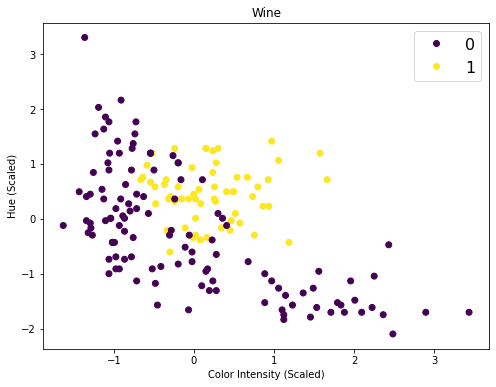

In [66]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

X_wine = datasets.load_wine(as_frame = True).data[['color_intensity', 'hue']]
y_wine = (datasets.load_wine(as_frame = True).target == 0)*1

print(X_wine)
print(y_wine)

# Scale X_wine.
scaler = StandardScaler()
X_wine = scaler.fit_transform(X=X_wine)

fig, ax = plt.subplots(figsize=(8,6));
scatter = ax.scatter(X_wine[:,0], X_wine[:,1],c=y_wine)
ax.legend(handles=scatter.legend_elements()[0],labels=['0','1'], fontsize=16);
ax.set_xlabel("Color Intensity (Scaled)")
ax.set_ylabel("Hue (Scaled)")
ax.set_title("Wine");

## 4.1
Fit an SVM model with a linear kernel to the whole dataset and print the accuracy on the whole dataset.

In [67]:
from sklearn.metrics import accuracy_score
from sklearn import svm

# YOUR CODE HERE:
clf = SVC(kernel='linear')
clf.fit(X_wine, y_wine.ravel())
#print('10-fold cv scores with Linear kernel: ', np.mean(cross_val_score(clf, X_wine, y_wine, cv=10)))
print("Model accuracy is:",clf.score(X_wine,y_wine))

Model accuracy is: 0.6853932584269663


## 4.2
Describe qualitatively why SVM with linear kernel has limited accuracy for this dataset.

### Answer:
SVM has poor accuracy and for some pratical problems are not linearly sepratebale. SVM is more effective in high dimensional spaces. SMV model with a linear kernel is kind of limited to interprete and to build model, which will give a low accuracy for the model.


## 4.3
Perform 10-fold CV with the following two SVM models:
- One using an RBF kernel with C=1.
- One using an RBF kernel with C=1e4.

Print the mean 10-fold CV accuracies of the models.

In [76]:
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC # "Support vector classifier"


# YOUR CODE HERE:
model1 = svm.SVC(kernel='rbf', C=1).fit(X_wine, y_wine)
# We choose C, which is a regularization parameter, very large. More details below
score1 = cross_val_score(model1, X_wine, y_wine, cv=10, scoring='accuracy')

model2 = svm.SVC(kernel='rbf', C=1e4).fit(X_wine, y_wine)
# We choose C, which is a regularization parameter, very large. More details below
score2 = cross_val_score(model2, X_wine, y_wine, cv=10, scoring='accuracy')


# Print the 'C=1 Mean Accuracy' and the 'C=1e4 Mean Accuracy'
# YOUR CODE HERE:
print("C=1 accuracy is:", score1.mean())
print("C=1e4 accuracy is:", score2.mean())

C=1 accuracy is: 0.8549019607843137
C=1e4 accuracy is: 0.8379084967320262


## 4.4
For each of the two models, create a plot showing:
- The decision boundaries and margins, and
- the support vectors (highlighted).

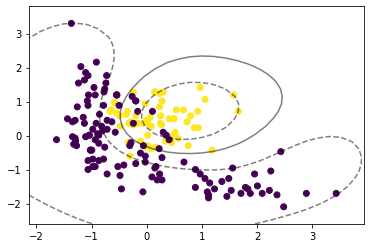

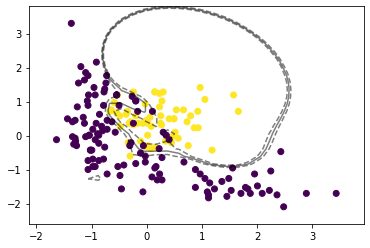

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Create grid to evaluate model
# YOUR CODE HERE:


#C=1
xx = np.linspace(X_wine[:,0].min()-0.5, X_wine[:,0].max()+0.5, 30)
yy = np.linspace(X_wine[:,1].min()-0.5, X_wine[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Fit the model with C=1.
# YOUR CODE HERE:

model1 = svm.SVC(kernel='rbf', C=1)
model1.fit(X_wine, y_wine.ravel()) 

Z1 = model1.decision_function(xy).reshape(XX.shape)


# Plot decision boundary and margins
# YOUR CODE HERE:

plt.contour(XX, YY, Z1, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(X_wine[:,0], X_wine[:,1], c=y_wine);
plt.show()


#C=1e4

xx = np.linspace(X_wine[:,0].min()-0.5, X_wine[:,0].max()+0.5, 30)
yy = np.linspace(X_wine[:,1].min()-0.5, X_wine[:,1].max()+0.5, 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Fit the model with C=1e4.
# YOUR CODE HERE:
model2 = svm.SVC(kernel='rbf', C=1e4)
model2.fit(X_wine, y_wine.ravel()) 
Z2 = model2.decision_function(xy).reshape(XX.shape)


# Plot decision boundary and margins
# YOUR CODE HERE:
plt.contour(XX, YY, Z2, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--']);
plt.scatter(X_wine[:,0], X_wine[:,1], c=y_wine);
plt.show()
